<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Kesten Processes and Firm Dynamics


<a id='index-0'></a>

## Contents

- [Kesten Processes and Firm Dynamics](#Kesten-Processes-and-Firm-Dynamics)  
  - [Overview](#Overview)  
  - [Kesten Processes](#Kesten-Processes)  
  - [Heavy Tails](#Heavy-Tails)  
  - [Application: Firm Dynamics](#Application:-Firm-Dynamics)  
  - [Exercises](#Exercises)  

In addition to what‚Äôs in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install quantecon
!pip install --upgrade yfinance

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 322.7/322.7 kB 5.1 MB/s eta 0:00:00


## Overview

[Previously](https://intro.quantecon.org/ar1_processes.html) we learned about linear scalar-valued stochastic processes (AR(1) models).

Now we generalize these linear models slightly by allowing the multiplicative coefficient to be stochastic.

Such processes are known as Kesten processes after German‚ÄìAmerican mathematician Harry Kesten (1931‚Äì2019)

Although simple to write down, Kesten processes are interesting for at least two reasons:

1. A number of significant economic processes are or can be described as Kesten processes.  
1. Kesten processes generate interesting dynamics, including, in some cases, heavy-tailed cross-sectional distributions.  


We will discuss these issues as we go along.

Let‚Äôs start with some imports:

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import quantecon as qe

The following two lines are only added to avoid a `FutureWarning` caused by
compatibility issues between pandas and matplotlib.

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Additional technical background related to this lecture can be found in the
monograph of [[Buraczewski *et al.*, 2016](https://python.quantecon.org/zreferences.html#id59)].

## Kesten Processes


<a id='index-1'></a>
A **Kesten process** is a stochastic process of the form


<a id='equation-kesproc'></a>
$$
X_{t+1} = a_{t+1} X_t + \eta_{t+1} \tag{23.1}
$$

where $ \{a_t\}_{t \geq 1} $ and $ \{\eta_t\}_{t \geq 1} $ are IID
sequences.

We are interested in the dynamics of $ \{X_t\}_{t \geq 0} $ when $ X_0 $ is given.

We will focus on the nonnegative scalar case, where $ X_t $ takes values in $ \mathbb R_+ $.

In particular, we will assume that

- the initial condition $ X_0 $ is nonnegative,  
- $ \{a_t\}_{t \geq 1} $ is a nonnegative IID stochastic process and  
- $ \{\eta_t\}_{t \geq 1} $ is another nonnegative IID stochastic process, independent of the first.  

ÁÆÄÂçïÊù•ËØ¥ÔºåËøô‰∏™Ê®°ÂûãÊèèËø∞ÁöÑÊòØ‰∏Ä‰∏™ Â∏¶Êúâ‰πòÊ≥ïÂíåÂä†Ê≥ïÈ°πÁöÑÈöèÊú∫ÊºîÂåñËøáÁ®ã„ÄÇÊØè‰∏™Êó∂Èó¥Ê≠•tÔºåÂèòÈáè Xt ÂÖàË¢´‰∏Ä‰∏™ÈöèÊú∫ÁöÑÊØî‰æãÂõ†Â≠êat+1 ËøõË°åÁº©ÊîæÔºà‰πòÊ≥ïÈ°πÔºâÔºåÁÑ∂ÂêéÂÜçÂä†‰∏ä‰∏Ä‰∏™ÈöèÊú∫ÁöÑÂÜ≤Âáª Œ∑t+1 ÔºàÂä†Ê≥ïÈ°πÔºâ„ÄÇËøôÁßçÁªìÊûÑÂπøÊ≥õÂ∫îÁî®‰∫éÈáëËûç„ÄÅÁªèÊµéÂ≠¶ÂíåÁâ©ÁêÜÁ≥ªÁªü‰∏≠Ôºå‰æãÂ¶ÇÂª∫Ê®°Ë¥¢ÂØåÂàÜÈÖç„ÄÅÁªèÊµéÂ¢ûÈïøÊàñÁ≤íÂ≠êÊâ©Êï£Á≠âÈóÆÈ¢ò„ÄÇ

### Example: GARCH Volatility

The GARCH model is common in financial applications, where time series such as asset returns exhibit time varying volatility.

For example, consider the following plot of daily returns on the Nasdaq
Composite Index for the period 1st January 2006 to 1st November 2019.


<a id='ndcode'></a>

#### Êó∂Èó¥Â∫èÂàóÂª∫Ê®°ÊñπÊ≥ïÂØπÊØîË°®

| **Â±ûÊÄß**      | **ÈöèÊú∫Ê∏∏Ëµ∞ (Random Walk)** | **Ëá™ÂõûÂΩí (AR(p))** | **ÁßªÂä®Âπ≥Âùá (MA(q))** | **ARMA (p, q)** | **ARCH (p)** | **GARCH (p, q)** |
|--------------|--------------------------|-------------------|-------------------|----------------|--------------|--------------|
| **ÂÖ¨Âºè** | $$ P_t = P_{t-1} + \epsilon_t $$ | $$ X_t = \phi_1 X_{t-1} + \dots + \phi_p X_{t-p} + \epsilon_t $$ | $$ X_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} $$ | $$ X_t = \phi_1 X_{t-1} + \dots + \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} $$ | $$ \sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \dots + \alpha_p \epsilon_{t-p}^2 $$ | $$ \sigma_t^2 = \alpha_0 + \sum_{i=1}^{p} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{q} \beta_j \sigma_{t-j}^2 $$ |
| **ÁõÆÊ†á** | ‰ª∑Ê†ºÂèòÂä®Áî±ÈöèÊú∫ÂÜ≤ÂáªÂÜ≥ÂÆöÔºåÊ®°ÊãüÈáëËûçÂ∏ÇÂú∫‰ª∑Ê†ºË°å‰∏∫ | Áî®ËøáÂéªÁöÑÂÄºÈ¢ÑÊµãÂΩìÂâçÂÄº | ÈÄöËøáËøáÂéªËØØÂ∑ÆÈ°π‰øÆÊ≠£ÂΩìÂâçÂÄº | ÁªìÂêà AR Âíå MA ËøõË°åÂª∫Ê®° | È¢ÑÊµãÊù°‰ª∂ÊñπÂ∑ÆÔºåÂª∫Ê®°Ê≥¢Âä®ÊÄßËÅöÈõÜ | ÁªìÂêà ARCH ÂíåËá™ÂõûÂΩíÁâπÊÄßÔºåÊèèËø∞ÈïøÊúüÊ≥¢Âä®ÊÄß |
| **‰ºòÁÇπ** | ÈÄÇÁî®‰∫éÊúâÊïàÂ∏ÇÂú∫ÔºåÁÆÄÂçïÊòìÁî® | ÈÄÇÁî®‰∫éÊúâËá™Áõ∏ÂÖ≥ÊÄßÁöÑÂπ≥Á®≥Â∫èÂàó | ÈÄÇÁî®‰∫éÁü≠ÊúüÂÜ≤ÂáªÂΩ±ÂìçÁöÑÂ∫èÂàó | ÈÄÇÁî®‰∫éÂπ≥Á®≥Êó∂Èó¥Â∫èÂàóÔºåÂÖºÈ°æË∂ãÂäø‰∏éÈöèÊú∫ÊÄß | ËÉΩÊçïÊçâÈáëËûçÂ∏ÇÂú∫ÁöÑÊ≥¢Âä®ÊÄß | ÈÄÇÁî®‰∫éÈïøËÆ∞ÂøÜÊ≥¢Âä®ÊÄßÂª∫Ê®° |
| **Áº∫ÁÇπ** | ÈùûÂπ≥Á®≥ÔºåÊó†Ê≥ïÈ¢ÑÊµãÈïøÊúüË∂ãÂäø | ÈúÄË¶ÅÈÄâÊã©ÂêàÈÄÇÁöÑÈò∂Êï∞ \( p \) | ‰ªÖÈÄÇÁî®‰∫éÁü≠Êúü‰æùËµñÂÖ≥Á≥ª | ‰ªÖÈÄÇÁî®‰∫éÂπ≥Á®≥Â∫èÂàóÔºåÊó†Ê≥ïÊèèËø∞Ê≥¢Âä®ÊÄßËÅöÈõÜ | ÈúÄË¶ÅÈÄâÊã©ÂêàÈÄÇÁöÑ \( p \)Ôºå‰∏çËÉΩÂ§ÑÁêÜÈïøËÆ∞ÂøÜ | ËÆ°ÁÆóÂ§çÊùÇÔºåÂèÇÊï∞‰º∞ËÆ°ÈöæÂ∫¶Â§ß |
| **ÈÄÇÁî®Âú∫ÊôØ** | ËÇ°Á•®‰ª∑Ê†º„ÄÅÂ§ñÊ±áÂ∏ÇÂú∫ | ÁªèÊµéÊï∞ÊçÆ„ÄÅ‰ø°Âè∑Â§ÑÁêÜ | ÈáëËûçÊó∂Èó¥Â∫èÂàó | ËÇ°Á•®Êî∂ÁõäÁéá„ÄÅÂÆèËßÇÁªèÊµéÊåáÊ†á | ÈáëËûçÈ£éÈô©ÁÆ°ÁêÜ„ÄÅÊ≥¢Âä®ÁéáÂª∫Ê®° | ÊúüÊùÉÂÆö‰ª∑„ÄÅËÇ°Á•®Ê≥¢Âä®ÁéáÂª∫Ê®° |

## Ê®°Âûã‰πãÈó¥ÁöÑÂÖ≥Á≥ªÂíåÂå∫Âà´

1. **ÈöèÊú∫Ê∏∏Ëµ∞ vs ARMA**
   - ÈöèÊú∫Ê∏∏Ëµ∞ÊòØÈùûÂπ≥Á®≥ÁöÑÔºåËÄå ARMA ÈÄÇÁî®‰∫éÂπ≥Á®≥Â∫èÂàó„ÄÇ
   - ÂØπ‰ª∑Ê†ºÂª∫Ê®°Êó∂Ôºå‰ª∑Ê†ºÈÄöÂ∏∏ÊòØÈöèÊú∫Ê∏∏Ëµ∞ÔºåËÄåÊî∂ÁõäÁéáÊòØÂπ≥Á®≥ÁöÑÔºåÂèØ‰ª•Áî® ARMA„ÄÇ

2. **AR vs MA**
   - AR ‰æùËµñËøáÂéªÁöÑÂÄºÔºåËÄå MA ‰æùËµñËøáÂéªÁöÑËØØÂ∑ÆÈ°π„ÄÇ
   - MA ÈÄÇÁî®‰∫éÁü≠ÊúüÂÜ≤ÂáªËæÉÂº∫ÁöÑÊÉÖÂÜµÔºåËÄå AR ÈÄÇÁî®‰∫éÂÖ∑ÊúâÈïøÊúüË∂ãÂäøÁöÑÊÉÖÂÜµ„ÄÇ

3. **ARMA vs ARCH/GARCH**
   - ARMA Âª∫Ê®°ÂùáÂÄºÔºåARCH/GARCH Âª∫Ê®°ÊñπÂ∑Æ„ÄÇ
   - ARMA ÈÄÇÁî®‰∫é**Âπ≥Á®≥Êî∂ÁõäÁéáÂ∫èÂàó**ÔºåARCH/GARCH ÈÄÇÁî®‰∫é**Ê≥¢Âä®ÁéáÂª∫Ê®°**„ÄÇ

4. **ARCH vs GARCH**
   - ARCH Âè™‰æùËµñËøáÂéªÁöÑËØØÂ∑ÆÂπ≥ÊñπÔºåËÄå GARCH ËøòËÄÉËôë‰∫ÜËøáÂéªÁöÑÊ≥¢Âä®Áéá„ÄÇ
   - GARCH ÈÄÇÁî®‰∫éÈïøËÆ∞ÂøÜÁöÑÊ≥¢Âä®ÊÄßÂ∫èÂàó„ÄÇ


In [5]:
s = yf.download('^IXIC', '2006-1-1', '2019-11-1')
s

[*********************100%***********************]  1 of 1 completed


Price             Close         High          Low         Open      Volume
Ticker            ^IXIC        ^IXIC        ^IXIC        ^IXIC       ^IXIC
Date                                                                      
2006-01-03  2243.739990  2249.679932  2189.909912  2216.530029  1998300000
2006-01-04  2263.459961  2265.280029  2246.070068  2246.959961  1887560000
2006-01-05  2276.870117  2277.560059  2264.500000  2264.929932  1891750000
2006-01-06  2305.620117  2306.719971  2281.010010  2289.209961  2233640000
2006-01-09  2318.689941  2322.629883  2303.129883  2306.179932  1949140000
...                 ...          ...          ...          ...         ...
2019-10-25  8243.120117  8249.969727  8150.589844  8150.589844  1911580000
2019-10-28  8325.990234  8335.559570  8285.269531  8285.769531  1959920000
2019-10-29  8276.849609  8319.290039  8275.139648  8313.349609  1842720000
2019-10-30  8303.980469  8315.500000  8241.700195  8284.280273  1936060000
2019-10-31  8292.360352  8321.799805  8248.809570  8314.379883  2276140000

[3482 rows x 5 columns]

In [9]:
s.columns


MultiIndex([( 'Close', '^IXIC'),
            (  'High', '^IXIC'),
            (   'Low', '^IXIC'),
            (  'Open', '^IXIC'),
            ('Volume', '^IXIC')],
           names=['Price', 'Ticker'])

In [10]:
s = s['Close']['^IXIC']

s

Date
2006-01-03    2243.739990
2006-01-04    2263.459961
2006-01-05    2276.870117
2006-01-06    2305.620117
2006-01-09    2318.689941
                 ...     
2019-10-25    8243.120117
2019-10-28    8325.990234
2019-10-29    8276.849609
2019-10-30    8303.980469
2019-10-31    8292.360352
Name: ^IXIC, Length: 3482, dtype: float64

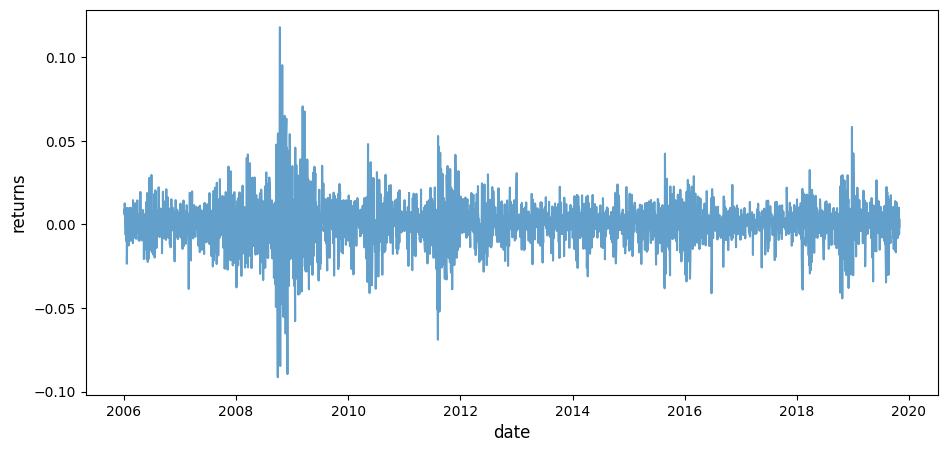

In [11]:
import yfinance as yf

# s = yf.download('^IXIC', '2006-1-1', '2019-11-1')['Adj Close']
  # ^IXIC ‰ª£Ë°® Á∫≥ÊñØËææÂÖãÁªºÂêàÊåáÊï∞ÔºàNasdaq Composite IndexÔºâ„ÄÇ
  # '2006-1-1' Âà∞ '2019-11-1' ÊåáÂÆöÊï∞ÊçÆÁöÑÊó∂Èó¥ËåÉÂõ¥„ÄÇ
  # ËØ•ÂáΩÊï∞ËøîÂõû‰∏Ä‰∏™ pandas.DataFrameÔºåÈªòËÆ§ÂåÖÂê´ ÂºÄÁõò‰ª∑ÔºàOpenÔºâ„ÄÅÊúÄÈ´ò‰ª∑ÔºàHighÔºâ„ÄÅÊúÄ‰Ωé‰ª∑ÔºàLowÔºâ„ÄÅÊî∂Áõò‰ª∑ÔºàCloseÔºâ„ÄÅË∞ÉÊï¥Êî∂Áõò‰ª∑ÔºàAdj CloseÔºâ„ÄÅ‰∫§ÊòìÈáèÔºàVolumeÔºâ„ÄÇ
r = s.pct_change() # ËÆ°ÁÆóÊØèÊó•Êî∂ÁõäÁéá

fig, ax = plt.subplots()

ax.plot(r, alpha=0.7)

ax.set_ylabel('returns', fontsize=12)
ax.set_xlabel('date', fontsize=12)

plt.show()

Notice how the series exhibits bursts of volatility (high variance) and then
settles down again.

GARCH models can replicate this feature.

The GARCH(1, 1) volatility process takes the form


<a id='equation-garch11v'></a>
$$
\sigma_{t+1}^2 = \alpha_0 + \sigma_t^2 (\alpha_1 \xi_{t+1}^2 + \beta) \tag{23.2}
$$

where $ \{\xi_t\} $ is IID with $ \mathbb E \xi_t^2 = 1 $ and all parameters are positive.

Returns on a given asset are then modeled as


<a id='equation-garch11r'></a>
$$
r_t = \sigma_t \zeta_t \tag{23.3}
$$

where $ \{\zeta_t\} $ is again IID and independent of $ \{\xi_t\} $.

The volatility sequence $ \{\sigma_t^2 \} $, which drives the dynamics of returns, is a Kesten process.

#### **GARCH(1,1) ÂÖ¨Âºè‰∏é Kesten ËøáÁ®ãÁöÑÂÖ≥Á≥ª**

## **1. Ê†áÂáÜ GARCH(1,1) ÂÖ¨Âºè**
GARCH(1,1) ËøáÁ®ãÈÄöÂ∏∏Ë°®Á§∫‰∏∫Ôºö

$$
\sigma_t^2 = \alpha_0 + \sum_{i=1}^{p} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{q} \beta_j \sigma_{t-j}^2
$$

ÂØπ‰∫é GARCH(1,1) Áâπ‰æãÔºåÂç≥ \( p = 1, q = 1 \)Ôºö

$$
\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2
$$

ÂÖ∂‰∏≠Ôºö
- \( \sigma_t^2 \) ÊòØ**Êù°‰ª∂ÊñπÂ∑ÆÔºàÊ≥¢Âä®ÁéáÁöÑÂπ≥ÊñπÔºâ**„ÄÇ
- \( \alpha_0 > 0 \) ÊòØ‰∏Ä‰∏™Â∏∏Êï∞Ôºå‰ª£Ë°®**ÊúÄ‰ΩéÊ≥¢Âä®Áéá**„ÄÇ
- \( \alpha_1 \) Ë°°ÈáèËøáÂéªÁöÑÊî∂ÁõäÂÜ≤Âáª \( \epsilon_{t-1}^2 \) ÂØπÂΩìÂâçÊ≥¢Âä®ÁéáÁöÑÂΩ±ÂìçÔºàARCH È°πÔºâ„ÄÇ
- \( \beta_1 \) Ë°°ÈáèËøáÂéªÁöÑÊ≥¢Âä®Áéá \( \sigma_{t-1}^2 \) ÂØπÂΩìÂâçÊ≥¢Âä®ÁéáÁöÑÂΩ±ÂìçÔºàGARCH È°πÔºâ„ÄÇ
- \( \epsilon_t \) ÊòØËµÑ‰∫ßÊî∂ÁõäÁéáÁöÑËØØÂ∑ÆÈ°πÔºåÈÄöÂ∏∏ÂÅáËÆæÔºö

$$
\epsilon_t = \sigma_t \zeta_t, \quad \zeta_t \sim \text{IID } N(0,1)
$$

---

## **2. ÂèòÂΩ¢ÂêéÁöÑ GARCH(1,1) ÂΩ¢Âºè**
(23.2) ÂÖ¨ÂºèÁªôÂá∫ÁöÑ GARCH(1,1) ÂΩ¢ÂºèÊòØÔºö

$$
\sigma_{t+1}^2 = \alpha_0 + \sigma_t^2 (\alpha_1 \xi_{t+1}^2 + \beta)
$$

Áõ∏ÊØî‰∫éÊ†áÂáÜ GARCH(1,1) ÂΩ¢ÂºèÔºö

$$
\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2
$$

Êàë‰ª¨ÂèØ‰ª•Âà©Áî® \( \epsilon_t^2 = \sigma_t^2 \zeta_t^2 \) ËøõË°åÈáçÂÜôÔºö

$$
\sigma_t^2 = \alpha_0 + \alpha_1 \sigma_{t-1}^2 \zeta_{t-1}^2 + \beta_1 \sigma_{t-1}^2
$$

$$
\sigma_t^2 = \alpha_0 + \sigma_{t-1}^2 (\alpha_1 \zeta_{t-1}^2 + \beta_1)
$$

Ëøô‰∏é (23.2) ÂΩ¢ÂºèÂá†‰πéÊòØÁõ∏ÂêåÁöÑÔºåÂè™ÊòØÊç¢‰∫ÜÁ¨¶Âè∑ÂíåÊó∂Èó¥Á¥¢ÂºïÔºåÂõ†Ê≠§ (23.2) **ÊòØ GARCH(1,1) ÁöÑ‰∏ÄÁßçÁ≠â‰ª∑ÂèòÂΩ¢**„ÄÇ

---

## **3. GARCH(1,1) ÊòØÂê¶Á¨¶Âêà Kesten ËøáÁ®ãÔºü**
Kesten ËøáÁ®ãÁöÑ‰∏ÄËà¨ÂΩ¢Âºè‰∏∫Ôºö

$$
X_{t+1} = a_{t+1} X_t + \eta_{t+1}
$$

ÂÖ∂‰∏≠Ôºö
- \( X_t \) ÊòØÊºîÂåñÂèòÈáèÔºàÂú® GARCH(1,1) ‰∏≠ÂØπÂ∫î‰∫é \( \sigma_t^2 \)Ôºâ„ÄÇ
- \( a_t \) ÊòØÈöèÊú∫ÊØî‰æãÂõ†Â≠êÔºåÂú® (23.2) ÂÖ¨Âºè‰∏≠ÂØπÂ∫î‰∫é \( \alpha_1 \xi_t^2 + \beta \)„ÄÇ
- \( \eta_t \) ÊòØÁã¨Á´ãÁöÑÂ§ñÈÉ®ÂÜ≤ÂáªÔºåÂú® (23.2) ÂÖ¨Âºè‰∏≠ÂØπÂ∫î‰∫é \( \alpha_0 \)„ÄÇ

**Âõ†Ê≠§Ôºå(23.2) ÂΩ¢ÂºèÁöÑ GARCH(1,1) ËøáÁ®ãÊú¨Ë¥®‰∏äÊòØ‰∏Ä‰∏™ Kesten ËøáÁ®ãÁöÑÁâπ‰æã„ÄÇ**

---


### Example: Wealth Dynamics

Suppose that a given household saves a fixed fraction $ s $ of its current wealth in every period.

The household earns labor income $ y_t $ at the start of time $ t $.

Wealth then evolves according to


<a id='equation-wealth-dynam'></a>
$$
w_{t+1} = R_{t+1} s w_t  + y_{t+1} \tag{23.4}
$$

where $ \{R_t\} $ is the gross rate of return on assets.

If $ \{R_t\} $ and $ \{y_t\} $ are both IID, then [(23.4)](#equation-wealth-dynam)
is a Kesten process.

### Stationarity

In earlier lectures, such as the one on [AR(1) processes](https://intro.quantecon.org/ar1_processes.html), we introduced the notion of a stationary distribution.

In the present context, we can define a stationary distribution as follows:

The distribution $ F^* $ on $ \mathbb R $ is called **stationary** for the
Kesten process [(23.1)](#equation-kesproc) if


<a id='equation-kp-stationary0'></a>
$$
X_t \sim F^*
\quad \implies \quad
a_{t+1} X_t + \eta_{t+1} \sim F^* \tag{23.5}
$$

In other words, if the current state $ X_t $ has distribution $ F^* $,
then so does the next period state $ X_{t+1} $.

We can write this alternatively as


<a id='equation-kp-stationary'></a>
$$
F^*(y) = \int \mathbb P\{ a_{t+1} x + \eta_{t+1} \leq y\} F^*(dx)
\quad \text{for all } y \geq 0. \tag{23.6}
$$
Áõ¥ËßÇ‰∏äÔºåÂÆÉÊèèËø∞‰∫Ü ‰∏ã‰∏ÄÊúüÁä∂ÊÄÅ X t+1  Â∞è‰∫éÁ≠â‰∫éy ÁöÑÊ¶ÇÁéá„ÄÇ

The left hand side is the distribution of the next period state when the
current state is drawn from $ F^* $.

The equality in [(23.6)](#equation-kp-stationary) states that this distribution is unchanged.

Âú®Êó∂Èó¥Â∫èÂàóÂàÜÊûê‰∏≠ÔºåÂπ≥Á®≥ÂàÜÂ∏ÉÔºàstationary distributionÔºâ Áõ¥ËßÇ‰∏äÊåáÁöÑÊòØÔºö
Â¶ÇÊûúÂΩìÂâçÁä∂ÊÄÅ ùëãùë°  Êúç‰ªéÊüê‰∏™ÂàÜÂ∏É ùêπ
‚àó ÔºåÈÇ£‰πà‰∏ã‰∏ÄÊúüÁä∂ÊÄÅ X t+1  ‰πüÊúç‰ªéÁõ∏ÂêåÁöÑÂàÜÂ∏É F ‚àó „ÄÇ
‰πüÂ∞±ÊòØËØ¥ÔºåÈöèÁùÄÊó∂Èó¥Êé®ÁßªÔºåÁ≥ªÁªüÁöÑÂàÜÂ∏É‰∏ç‰ºöÂèëÁîüÂèòÂåñÔºåËÄåÊòØ‰øùÊåÅÁªüËÆ°Á®≥ÂÆö„ÄÇ

### Cross-Sectional Interpretation

There is an important cross-sectional interpretation of stationary distributions, discussed previously but worth repeating here.

Suppose, for example, that we are interested in the wealth distribution ‚Äî that is, the current distribution of wealth across households in a given country.

Suppose further that

- the wealth of each household evolves independently according to
  [(23.4)](#equation-wealth-dynam),  
- $ F^* $ is a stationary distribution for this stochastic process and  
- there are many households.  


Then $ F^* $ is a **steady state for the cross-sectional wealth distribution in this country.**

In other words, if $ F^* $ is the current wealth distribution then it will
remain so in subsequent periods, *ceteris paribus*.

To see this, suppose that $ F^* $ is the current wealth distribution.

What is the fraction of households with wealth less than $ y $ next
period?

To obtain this, we sum the probability that wealth is less than $ y $ tomorrow, given that current wealth is $ w $, weighted by the fraction of households with wealth $ w $.

Noting that the fraction of households with wealth in interval $ dw $ is $ F^*(dw) $, we get

$$
\int \mathbb P\{ R_{t+1} s w  + y_{t+1} \leq y\} F^*(dw)
$$

By the definition of stationarity and the assumption that $ F^* $ is stationary for the wealth process, this is just $ F^*(y) $.

Hence the fraction of households with wealth in $ [0, y] $ is the same
next period as it is this period.

Since $ y $ was chosen arbitrarily, the distribution is unchanged.

Â¶ÇÊûúÊîøÁ≠ñÊ≤°ÊúâÊîπÂèòË¥¢ÂØåÁßØÁ¥ØËøáÁ®ãÔºà23.4ÔºâÔºåÈÇ£‰πàÈïøÊúüÊù•ÁúãÔºåË¥¢ÂØåÂàÜÂ∏É‰ªçÁÑ∂‰ºöÂõûÂΩíÂà∞ùêπ‚àó ÔºåÊîøÁ≠ñÁöÑÁü≠ÊúüÂΩ±Âìç‰∏ç‰ºöÊîπÂèòÈïøÊúüË¥¢ÂØåÁªìÊûÑ„ÄÇ


### Conditions for Stationarity

The Kesten process $ X_{t+1} = a_{t+1} X_t + \eta_{t+1} $ does not always
have a stationary distribution.

For example, if $ a_t \equiv \eta_t \equiv 1 $ for all $ t $, then
$ X_t = X_0 + t $, which diverges to infinity.

To prevent this kind of divergence, we require that $ \{a_t\} $ is
strictly less than 1 most of the time.

In particular, if


<a id='equation-kp-stat-cond'></a>
$$
\mathbb E \ln a_t < 0
\quad \text{and} \quad
\mathbb E \eta_t < \infty \tag{23.7}
$$

then a unique stationary distribution exists on $ \mathbb R_+ $.

- See, for example, theorem 2.1.3 of [[Buraczewski *et al.*, 2016](https://python.quantecon.org/zreferences.html#id59)], which provides slightly weaker conditions.  


As one application of this result, we see that the wealth process
[(23.4)](#equation-wealth-dynam) will have a unique stationary distribution whenever
labor income has finite mean and $ \mathbb E \ln R_t  + \ln s < 0 $.

#### **Âπ≥Á®≥ÊÄßÊù°‰ª∂ÔºàConditions for StationarityÔºâ**


## **2. Âπ≥Á®≥ÂàÜÂ∏ÉÁöÑÊù°‰ª∂**
‰∏∫‰∫ÜÈÅøÂÖç \( X_t \) Êó†ÈôêÂ¢ûÈïøÔºåÊàë‰ª¨Â∏åÊúõ \( a_t \) Âú®Âπ≥ÂùáÊÑè‰πâ‰∏äÂ§ßÈÉ®ÂàÜÊó∂Èó¥Â∞è‰∫é 1„ÄÇ

Êï∞Â≠¶‰∏äÔºåÈúÄË¶ÅÊª°Ë∂≥‰ª•‰∏ã **‰∏§‰∏™Êù°‰ª∂**Ôºö
$$
\mathbb{E} \ln a_t < 0
\quad \text{and} \quad
\mathbb{E} \eta_t < \infty
\tag{23.7}
$$

### **(1) Ëß£ÈáäÁ¨¨‰∏Ä‰∏™Êù°‰ª∂Ôºö \( \mathbb{E} \ln a_t < 0 \)**
- **ËøôÊÑèÂë≥ÁùÄ \( a_t \) Âú®ÈïøÊúüÂÜÖÁöÑ‚ÄúÂπ≥ÂùáÁº©ÊîæÁéá‚ÄùÊòØÂ∞è‰∫é 1 ÁöÑ„ÄÇ**
- Â¶ÇÊûú \( \mathbb{E} \ln a_t > 0 \)ÔºåÂàô \( a_t \) Âú®ÈïøÊúüÊù•Áúã‰ºöÂèòÂ§ßÔºå‰ªéËÄå‰ΩøÂæó \( X_t \) Ë∂äÊù•Ë∂äÂ§ßÔºåÊ≤°ÊúâÂπ≥Á®≥ÂàÜÂ∏É„ÄÇ
- ‰ΩÜÂ¶ÇÊûú \( \mathbb{E} \ln a_t < 0 \)ÔºåÈÇ£‰πà \( X_t \) ‰ºöÂú®ÈïøÊúüÂÜÖÂèóÂà∞ÊäëÂà∂ÔºåË∂ãÂêë‰∏Ä‰∏™ÊúâÈôêÂàÜÂ∏É„ÄÇ

### **(2) Ëß£ÈáäÁ¨¨‰∫å‰∏™Êù°‰ª∂Ôºö \( \mathbb{E} \eta_t < \infty \)**
- **ËøôÊÑèÂë≥ÁùÄ \( \eta_t \) ÁöÑÂùáÂÄºÊòØÊúâÈôêÁöÑÔºåÂç≥ÈöèÊú∫ÂÜ≤Âáª \( \eta_t \) ‰∏çËÉΩËøáÂ§ß„ÄÇ**
- Â¶ÇÊûú \( \eta_t \) Âπ≥ÂùáÂÄºÂ§™Â§ßÔºåÂç≥‰Ωø \( a_t \) ËÆ© \( X_t \) Êî∂Áº©Ôºå**Â§ßÈáèÁöÑÈöèÊú∫ÂÜ≤Âáª‰ªçÁÑ∂‰ºöÊé®Âä® \( X_t \) Â¢ûÈïø**ÔºåÂØºËá¥ÂÆÉÊó†Ê≥ïÁ®≥ÂÆö„ÄÇ

**ÊÄªÁªìÔºö**
- **\( \mathbb{E} \ln a_t < 0 \) Á°Æ‰øù \( X_t \) Âú®ÈïøÊúüÂÜÖ‰∏ç‰ºöÊó†ÈôêÂ¢ûÈïø**„ÄÇ
- **\( \mathbb{E} \eta_t < \infty \) Á°Æ‰øùÈöèÊú∫ÂÜ≤Âáª‰∏ç‰ºöÊó†ÈôêÂ§ßÔºåÈÅøÂÖçË¥¢ÂØåÁàÜÁÇ∏**„ÄÇ

Â¶ÇÊûúËøô‰∏§‰∏™Êù°‰ª∂Êª°Ë∂≥ÔºåKesten ËøáÁ®ãÂ∞±Êúâ‰∏Ä‰∏™**ÂîØ‰∏ÄÁöÑÂπ≥Á®≥ÂàÜÂ∏É**„ÄÇ

---

## **3. Â∫îÁî®Âà∞Ë¥¢ÂØåÂàÜÂ∏É**
### **Ë¥¢ÂØåÊºîÂåñÊñπÁ®ãÔºà23.4Ôºâ**
ÂÆ∂Â∫≠Ë¥¢ÂØåÊåâÁÖßÔºö
$$
w_{t+1} = R_{t+1} s w_t  + y_{t+1}
$$
ÊºîÂåñ„ÄÇ

Â¶ÇÊûúÊàë‰ª¨Â∏åÊúõË¥¢ÂØåÂàÜÂ∏ÉÊúâ**Á®≥ÊÄÅÂàÜÂ∏É**ÔºåÈÇ£‰πàÔºö
1. ËµÑ‰∫ßÂõûÊä• \( R_t \) ‰∏çËÉΩÂ§™Â§ßÔºåÂê¶ÂàôË¥¢ÂØå‰ºö‰∏çÊñ≠Â¢ûÈïø„ÄÇ
2. Âä≥Âä®Êî∂ÂÖ• \( y_t \) ‰∏çËÉΩÊó†ÈôêÂ¢ûÈïøÔºåÂê¶ÂàôË¥¢ÂØå‰ºöÊó†ÈôêÁßØÁ¥Ø„ÄÇ

Ê†πÊçÆ Kesten ËøáÁ®ãÁöÑÊù°‰ª∂ÔºåË¥¢ÂØåÂàÜÂ∏ÉÂ≠òÂú®Á®≥ÊÄÅÁöÑÊù°‰ª∂ÊòØÔºö
$$
\mathbb{E} \ln R_t  + \ln s < 0
$$

### **Â¶Ç‰ΩïÁêÜËß£Ëøô‰∏™Êù°‰ª∂Ôºü**
- **\( \mathbb{E} \ln R_t \)**ÔºöËµÑ‰∫ßÂõûÊä• \( R_t \) ÁöÑÈïøÊúüÂ¢ûÈïøÁéá„ÄÇ
- **\( \ln s \)**ÔºöÂÇ®ËìÑÁéá \( s \) ÁöÑÂõ∫ÂÆöÁº©ÊîæÂõ†Â≠ê„ÄÇ

Â¶ÇÊûú \( \mathbb{E} \ln R_t  + \ln s < 0 \)ÔºåÊÑèÂë≥ÁùÄÔºö
- **Ë¥¢ÂØåÂú®ÈïøÊúüÂÜÖ‚ÄúÂπ≥Âùá‚ÄùÊòØÊî∂Áº©ÁöÑÔºàË¥¢ÂØå‰∏ç‰ºöÊó†ÈôêÂ¢ûÈïøÔºâ**„ÄÇ
- Ëøô‰øùËØÅ‰∫ÜË¥¢ÂØå‰∏ç‰ºöÁàÜÁÇ∏Ôºå‰ªéËÄåÂΩ¢Êàê‰∏Ä‰∏™Âπ≥Á®≥ÂàÜÂ∏É„ÄÇ

Â¶ÇÊûúËøô‰∏™Êù°‰ª∂‰∏çÊª°Ë∂≥Ôºå‰æãÂ¶ÇÔºö
- \( R_t \) ÁöÑÂ¢ûÈïøÁéáÂæàÂ§ßÔºàÊØîÂ¶ÇËÇ°Â∏ÇÈïøÊúüÁâõÂ∏ÇÔºâÔºåÊàñËÄÖ
- \( s \) ÈùûÂ∏∏Â§ßÔºàÂÇ®ËìÑÁéáÊûÅÈ´òÔºâÔºå

ÈÇ£‰πàË¥¢ÂØå‰ºöÊåÅÁª≠Â¢ûÈïøÔºå‰∏ç‰ºöÂΩ¢ÊàêÁ®≥ÂÆöÁöÑË¥¢ÂØåÂàÜÂ∏É„ÄÇ


## Heavy Tails

Under certain conditions, the stationary distribution of a Kesten process has
a Pareto tail.

(See our [earlier lecture](https://intro.quantecon.org/heavy_tails.html)  on heavy-tailed distributions for background.)

This fact is significant for economics because of the prevalence of Pareto-tailed distributions.

### The Kesten‚ÄìGoldie Theorem

To state the conditions under which the stationary distribution of a Kesten process has a Pareto tail, we first recall that a random variable is called **nonarithmetic** if its distribution is not concentrated on $ \{\dots, -2t, -t, 0, t, 2t, \ldots \} $ for any $ t \geq 0 $.

For example, any random variable with a density is nonarithmetic.

The famous Kesten‚ÄìGoldie Theorem (see, e.g., [[Buraczewski *et al.*, 2016](https://python.quantecon.org/zreferences.html#id59)], theorem 2.4.4) states that if

1. the stationarity conditions in [(23.7)](#equation-kp-stat-cond) hold,  
1. the random variable $ a_t $ is positive with probability one and nonarithmetic,  
1. $ \mathbb P\{a_t x + \eta_t = x\} < 1 $ for all $ x \in \mathbb R_+ $ and  
1. there exists a positive constant $ \alpha $ such that  


$$
\mathbb E a_t^\alpha = 1,
    \quad
\mathbb E \eta_t^\alpha < \infty,
    \quad \text{and} \quad
\mathbb E [a_t^{\alpha+1} ] < \infty
$$

then the stationary distribution of the Kesten process has a Pareto tail with
tail index $ \alpha $.

More precisely, if $ F^* $ is the unique stationary distribution and $ X^* \sim F^* $, then

$$
\lim_{x \to \infty} x^\alpha \mathbb P\{X^* > x\} = c
$$

for some positive constant $ c $.

### Intuition

Later we will illustrate the Kesten‚ÄìGoldie Theorem using rank-size plots.

Prior to doing so, we can give the following intuition for the conditions.

Two important conditions are that $ \mathbb E \ln a_t < 0 $, so the model
is stationary, and $ \mathbb E a_t^\alpha = 1 $ for some $ \alpha >
0 $.

The first condition implies that the distribution of $ a_t $ has a large amount of probability mass below 1.

The second condition implies that the distribution of $ a_t $ has at least some probability mass at or above 1.

The first condition gives us existence of the stationary condition.

The second condition means that the current state can be expanded by $ a_t $.

If this occurs for several concurrent periods, the effects compound each other, since $ a_t $ is multiplicative.

This leads to spikes in the time series, which fill out the extreme right hand tail of the distribution.

The spikes in the time series are visible in the following simulation, which generates of 10 paths when $ a_t $ and $ b_t $ are lognormal.

In [ ]:
Œº = -0.5
œÉ = 1.0

def kesten_ts(ts_length=100):
    x = np.zeros(ts_length)
    for t in range(ts_length-1):
        a = np.exp(Œº + œÉ * np.random.randn())
        b = np.exp(np.random.randn())
        x[t+1] = a * x[t] + b
    return x

fig, ax = plt.subplots()

num_paths = 10
np.random.seed(12)

for i in range(num_paths):
    ax.plot(kesten_ts())

ax.set(xlabel='time', ylabel='$X_t$')
plt.show()

## Application: Firm Dynamics

As noted in our [lecture on heavy tails](https://intro.quantecon.org/heavy_tails.html), for common measures of firm size such as revenue or employment, the US firm size distribution exhibits a Pareto tail (see, e.g., [[Axtell, 2001](https://python.quantecon.org/zreferences.html#id69)], [[Gabaix, 2016](https://python.quantecon.org/zreferences.html#id68)]).

Let us try to explain this rather striking fact using the Kesten‚ÄìGoldie Theorem.

### Gibrat‚Äôs Law

It was postulated many years ago by Robert Gibrat [[Gibrat, 1931](https://python.quantecon.org/zreferences.html#id58)] that firm size evolves according to a simple rule whereby size next period is proportional to current size.

This is now known as [Gibrat‚Äôs law of proportional growth](https://en.wikipedia.org/wiki/Gibrat%27s_law).

We can express this idea by stating that a suitably defined measure
$ s_t $ of firm size obeys


<a id='equation-firm-dynam-gb'></a>
$$
\frac{s_{t+1}}{s_t} = a_{t+1} \tag{23.8}
$$

for some positive IID sequence $ \{a_t\} $.

One implication of Gibrat‚Äôs law is that the growth rate of individual firms
does not depend on their size.

However, over the last few decades, research contradicting Gibrat‚Äôs law has
accumulated in the literature.

For example, it is commonly found that, on average,

1. small firms grow faster than large firms (see, e.g., [[Evans, 1987](https://python.quantecon.org/zreferences.html#id57)] and [[Hall, 1987](https://python.quantecon.org/zreferences.html#id56)]) and  
1. the growth rate of small firms is more volatile than that of large firms [[Dunne *et al.*, 1989](https://python.quantecon.org/zreferences.html#id55)].  


On the other hand, Gibrat‚Äôs law is generally found to be a reasonable
approximation for large firms [[Evans, 1987](https://python.quantecon.org/zreferences.html#id57)].

We can accommodate these empirical findings by modifying [(23.8)](#equation-firm-dynam-gb)
to


<a id='equation-firm-dynam'></a>
$$
s_{t+1} = a_{t+1} s_t + b_{t+1} \tag{23.9}
$$

where $ \{a_t\} $ and $ \{b_t\} $ are both IID and independent of each
other.

In the exercises you are asked to show that [(23.9)](#equation-firm-dynam) is more
consistent with the empirical findings presented above than Gibrat‚Äôs law in
[(23.8)](#equation-firm-dynam-gb).

### Heavy Tails

So what has this to do with Pareto tails?

The answer is that [(23.9)](#equation-firm-dynam) is a Kesten process.

If the conditions of the Kesten‚ÄìGoldie Theorem are satisfied, then the firm
size distribution is predicted to have heavy tails ‚Äî which is exactly what
we see in the data.

In the exercises below we explore this idea further, generalizing the firm
size dynamics and examining the corresponding rank-size plots.

We also try to illustrate why the Pareto tail finding is significant for
quantitative analysis.

## Exercises

## Exercise 23.1

Simulate and plot 15 years of daily returns (consider each year as having 250
working days) using the GARCH(1, 1) process in [(23.2)](#equation-garch11v)‚Äì[(23.3)](#equation-garch11r).

Take $ \xi_t $ and $ \zeta_t $ to be independent and standard normal.

Set $ \alpha_0 = 0.00001, \alpha_1 = 0.1, \beta = 0.9 $ and $ \sigma_0 = 0 $.

Compare visually with the Nasdaq Composite Index returns [shown above](#ndcode).

While the time path differs, you should see bursts of high volatility.

## Solution to[ Exercise 23.1](https://python.quantecon.org/#kp_ex1)

Here is one solution:

In [ ]:
Œ±_0 = 1e-5
Œ±_1 = 0.1
Œ≤ = 0.9

years = 15
days = years * 250

def garch_ts(ts_length=days):
    œÉ2 = 0
    r = np.zeros(ts_length)
    for t in range(ts_length-1):
        Œæ = np.random.randn()
        œÉ2 = Œ±_0 + œÉ2 * (Œ±_1 * Œæ**2 + Œ≤)
        r[t] = np.sqrt(œÉ2) * np.random.randn()
    return r

fig, ax = plt.subplots()

np.random.seed(12)

ax.plot(garch_ts(), alpha=0.7)

ax.set(xlabel='time', ylabel='$\\sigma_t^2$')
plt.show()

## Exercise 23.2

In our discussion of firm dynamics, it was claimed that [(23.9)](#equation-firm-dynam) is more consistent with the empirical literature than Gibrat‚Äôs law in [(23.8)](#equation-firm-dynam-gb).

(The empirical literature was reviewed immediately above [(23.9)](#equation-firm-dynam).)

In what sense is this true (or false)?

## Solution to[ Exercise 23.2](https://python.quantecon.org/#kp_ex2)

The empirical findings are that

1. small firms grow faster than large firms  and  
1. the growth rate of small firms is more volatile than that of large firms.  


Also, Gibrat‚Äôs law is generally found to be a reasonable approximation for
large firms than for small firms

The claim is that the dynamics in [(23.9)](#equation-firm-dynam) are more consistent with
points 1-2 than Gibrat‚Äôs law.

To see why, we rewrite [(23.9)](#equation-firm-dynam) in terms of growth dynamics:


<a id='equation-firm-dynam-2'></a>
$$
\frac{s_{t+1}}{s_t} = a_{t+1} + \frac{b_{t+1}}{s_t} \tag{23.10}
$$

Taking $ s_t = s $ as given, the mean and variance of firm growth are

$$
\mathbb E a
+ \frac{\mathbb E b}{s}
\quad \text{and} \quad
\mathbb V a
+ \frac{\mathbb V b}{s^2}
$$

Both of these decline with firm size $ s $, consistent with the data.

Moreover, the law of motion [(23.10)](#equation-firm-dynam-2) clearly approaches Gibrat‚Äôs law
[(23.8)](#equation-firm-dynam-gb) as $ s_t $ gets large.

## Exercise 23.3

Consider an arbitrary Kesten process as given in [(23.1)](#equation-kesproc).

Suppose that $ \{a_t\} $ is lognormal with parameters $ (\mu,
\sigma) $.

In other words, each $ a_t $ has the same distribution as $ \exp(\mu + \sigma Z) $ when $ Z $ is standard normal.

Suppose further that $ \mathbb E \eta_t^r < \infty $ for every $ r > 0 $, as
would be the case if, say, $ \eta_t $ is also lognormal.

Show that the conditions of the Kesten‚ÄìGoldie theorem are satisfied if and
only if $ \mu < 0 $.

Obtain the value of $ \alpha $ that makes the Kesten‚ÄìGoldie conditions
hold.

## Solution to[ Exercise 23.3](https://python.quantecon.org/#kp_ex3)

Since $ a_t $ has a density it is nonarithmetic.

Since $ a_t $ has the same density as $ a = \exp(\mu + \sigma Z) $ when $ Z $ is standard normal, we have

$$
\mathbb E \ln a_t = \mathbb E (\mu + \sigma Z) = \mu,
$$

and since $ \eta_t $ has finite moments of all orders, the stationarity
condition holds if and only if $ \mu < 0 $.

Given the properties of the lognormal distribution (which has finite moments
of all orders), the only other condition in doubt is existence of a positive constant
$ \alpha $ such that $ \mathbb E a_t^\alpha = 1 $.

This is equivalent to the statement

$$
\exp \left( \alpha \mu + \frac{\alpha^2 \sigma^2}{2} \right) = 1.
$$

Solving for $ \alpha $ gives $ \alpha = -2\mu / \sigma^2 $.

## Exercise 23.4

One unrealistic aspect of the firm dynamics specified in [(23.9)](#equation-firm-dynam) is
that it ignores entry and exit.

In any given period and in any given market, we observe significant numbers of firms entering and exiting the market.

Empirical discussion of this can be found in a famous paper by Hugo Hopenhayn [[Hopenhayn, 1992](https://python.quantecon.org/zreferences.html#id174)].

In the same paper, Hopenhayn builds a model of entry and exit that
incorporates profit maximization by firms and market clearing quantities, wages and prices.

In his model, a stationary equilibrium occurs when the number of entrants
equals the number of exiting firms.

In this setting, firm dynamics can be expressed as


<a id='equation-firm-dynam-ee'></a>
$$
s_{t+1} = e_{t+1} \mathbb{1}\{s_t < \bar s\} +
(a_{t+1} s_t + b_{t+1}) \mathbb{1}\{s_t \geq \bar s\} \tag{23.11}
$$

Here

- the state variable $ s_t $ represents productivity (which is a proxy
  for output and hence firm size),  
- the IID sequence $ \{ e_t \} $ is thought of as a productivity draw for a new
  entrant and  
- the variable $ \bar s $ is a threshold value that we take as given,
  although it is determined endogenously in Hopenhayn‚Äôs model.  


The idea behind [(23.11)](#equation-firm-dynam-ee) is that firms stay in the market as long
as their productivity $ s_t $ remains at or above $ \bar s $.

- In this case, their productivity updates according to [(23.9)](#equation-firm-dynam).  


Firms choose to exit when their productivity $ s_t $ falls below $ \bar s $.

- In this case, they are replaced by a new firm with productivity
  $ e_{t+1} $.  


What can we say about dynamics?

Although [(23.11)](#equation-firm-dynam-ee) is not a Kesten process, it does update in the
same way as a Kesten process when $ s_t $ is large.

So perhaps its stationary distribution still has Pareto tails?

Your task is to investigate this question via simulation and rank-size plots.

The approach will be to

1. generate $ M $ draws of $ s_T $ when $ M $ and $ T $ are
  large and  
1. plot the largest 1,000 of the resulting draws in a rank-size plot.  


(The distribution of $ s_T $ will be close to the stationary distribution
when $ T $ is large.)

In the simulation, assume that

- each of $ a_t, b_t $ and $ e_t $ is lognormal,  
- the parameters are  

In [ ]:
Œº_a = -0.5        # location parameter for a
œÉ_a = 0.1         # scale parameter for a
Œº_b = 0.0         # location parameter for b
œÉ_b = 0.5         # scale parameter for b
Œº_e = 0.0         # location parameter for e
œÉ_e = 0.5         # scale parameter for e
s_bar = 1.0       # threshold
T = 500           # sampling date
M = 1_000_000     # number of firms
s_init = 1.0      # initial condition for each firm

## Solution to[ Exercise 23.4](https://python.quantecon.org/#kp_ex4)

Here‚Äôs one solution.
First we generate the observations:

In [ ]:
from numba import jit, prange
from numpy.random import randn


@jit(parallel=True)
def generate_draws(Œº_a=-0.5,
                   œÉ_a=0.1,
                   Œº_b=0.0,
                   œÉ_b=0.5,
                   Œº_e=0.0,
                   œÉ_e=0.5,
                   s_bar=1.0,
                   T=500,
                   M=1_000_000,
                   s_init=1.0):

    draws = np.empty(M)
    for m in prange(M):
        s = s_init
        for t in range(T):
            if s < s_bar:
                new_s = np.exp(Œº_e + œÉ_e *  randn())
            else:
                a = np.exp(Œº_a + œÉ_a * randn())
                b = np.exp(Œº_b + œÉ_b * randn())
                new_s = a * s + b
            s = new_s
        draws[m] = s

    return draws

data = generate_draws()

Now we produce the rank-size plot:

In [ ]:
fig, ax = plt.subplots()

rank_data, size_data = qe.rank_size(data, c=0.01)
ax.loglog(rank_data, size_data, 'o', markersize=3.0, alpha=0.5)
ax.set_xlabel("log rank")
ax.set_ylabel("log size")

plt.show()

The plot produces a straight line, consistent with a Pareto tail.